In [1]:
import pandas as pd
import numpy as np

0.03

In [75]:
df=pd.read_csv("combined.csv")

In [76]:
thevar=['s']
def convertToFloat(x):
    x=x.strip()
    if x=="-" or x=="NR" or x=='' or x=="." or x=="" or x==' ':
        return 0
    else:
        thevar[0]=x
        return float(x)

In [96]:
df["rain"]=df["Rain"].apply(convertToFloat)

In [97]:
import datetime
df["month"]=df["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").month)
df["year"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)
df["day"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").day)

In [98]:
df_grouped=df.groupby(["District","year","month"]).mean().reset_index()

In [99]:
def addDate(row):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-99-e5166600c817>, line 2)

In [ ]:
df_grouped

In [134]:
Alangayam_df=df_grouped[df_grouped["District"]=="Alangayam"][["month","year","rain"]]


In [112]:
Alangayam_df.set_index("Date",inplace=True)

In [101]:
Alangayam_df=df[df["District"]=="Alangayam"][["Date","rain"]]

In [102]:
Alangayam_df.set_index("Date",inplace=True)
Alangayam_df

,rain
Date,
2010-01-01,0.0
2010-01-02,0.0
2010-01-03,0.0
2010-01-04,0.0
2010-01-05,0.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0


In [113]:
import plotly.express as px
fig = px.line(df, x="Date", y="rain", facet_col="District",facet_col_wrap=4)


In [114]:

fig.show()

0

<h3>The Squashed histogram below means that this dataset is <b>NOT</b> a bell curve(Normal) distribution. Hence It is evident that the dataset is not stationary</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E2B6E6250>]],
      dtype=object)

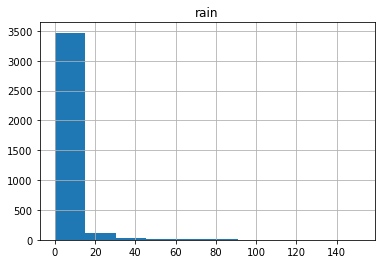

In [86]:
Alangayam_df.hist()

In [139]:
traindf=Alangayam_df[:108]
testdf=Alangayam_df[108:]

In [103]:
traindf=Alangayam_df[:3287]
testdf=Alangayam_df[3287:]

In [47]:
traindf

,rain
Date,
2010-01-01,0.03
2010-01-02,0.03
2010-01-03,0.03
2010-01-04,0.03
2010-01-05,0.03
...,...
2018-12-27,0.03
2018-12-28,0.03
2018-12-29,0.03


In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(traindf["rain"])

Results of Dickey-Fuller Test:
Test Statistic                -1.635303e+01
p-value                        2.919838e-29
#Lags Used                     7.000000e+00
Number of Observations Used    3.279000e+03
Critical Value (1%)           -3.432346e+00
Critical Value (5%)           -2.862422e+00
Critical Value (10%)          -2.567239e+00
dtype: float64


<pre>Both the augmented Dickey-Fuller (ADF) test and the Kwiatkowski, Phillips, Schmidt and Shin (KPSS) test are tailored for detecting nonstationarity in the form of a unit root in the process. (The test equations explicitly allow for a unit root; see the refence below.) However, they are not tailored for detecting other forms of nonstationarity. Therefore, it is not surprising that they do not detect nonstationarity of the seasonal kind.

    The result of the ADF test (p

-value below 0.05) suggests that the null hypothesis of presence of a unit root can be rejected at 95% confidence level.
The result of the KPSS test (p

    -value above 0.05) suggests that the null hypothesis of absence of a unit root presence of unit root cannot be rejected at 95% confidence level.

(The bullet points are there just to confirm what you implied.)

For an accessible and intuitive yet technically precise treatment of the ADF and the KPSS tests I suggest Eric Zivot's "Modelling Financial Time Series with S-PLUS" (2nd ed., 2006) Chapter 4 "Unit Root Tests" (especially sections 4.3 and 4.4).</pre>

In [174]:
traindf["rain"]=traindf["rain"].apply(lambda x: np.log(x))

<ipython-input-174-3f80abcf8c01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



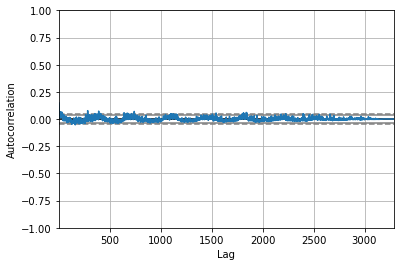

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(traindf["rain"])

In [69]:
traindf

,rain
Date,
2010-01-01,0.0
2010-01-02,0.0
2010-01-03,0.0
2010-01-04,0.0
2010-01-05,0.0
...,...
2018-12-27,0.0
2018-12-28,0.0
2018-12-29,0.0


In [72]:
from statsmodels.tsa.arima_model import ARIMA
train_log_v=list(traindf["rain"].values)
test_log_v=list(testdf["rain"].values)
predictions=list()
model = ARIMA(train_log_v, order=(37,0,1))
# for t in range(len(test_log_v)):
#     # LAG-3, MOVING AVG-2
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test_log_v[t]
#     train_log_v.append(obs)



In [73]:
fitted=model.fit()

KeyboardInterrupt: 

4

In [66]:
fc,_,_=fitted.forecast(testdf.shape[0])

In [151]:
exp_fc=np.exp(fc)

In [67]:
fc

array([1.32142278, 1.47173683, 1.53250466, 1.58417214, 1.63298874,
       1.67953073, 1.72393642, 1.76630632, 1.80673397, 1.84530841,
       1.8821146 , 1.91723358, 1.95074271, 1.98271578, 2.0132232 ,
       2.04233215, 2.07010675, 2.09660815, 2.12189473, 2.14602217,
       2.16904361, 2.19100974, 2.21196894, 2.23196737, 2.25104907,
       2.26925606, 2.28662844, 2.30320447, 2.31902065, 2.33411182,
       2.34851121, 2.36225053, 2.37536003, 2.3878686 , 2.39980377,
       2.41119183, 2.42205786, 2.43242579, 2.44231846, 2.45175764,
       2.46076413, 2.46935777, 2.47755746, 2.48538129, 2.49284647,
       2.49996944, 2.5067659 , 2.51325081, 2.51943844, 2.52534244,
       2.5309758 , 2.53635092, 2.54147965, 2.54637327, 2.55104257,
       2.55549783, 2.55974886, 2.56380502, 2.56767525, 2.57136807,
       2.5748916 , 2.57825362, 2.58146152, 2.58452238, 2.58744292,
       2.59022958, 2.5928885 , 2.59542554, 2.59784628, 2.60015605,
       2.60235995, 2.60446281, 2.60646928, 2.60838378, 2.61021

In [54]:
testdf["rain"].values

array([3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02,
       3.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 

In [26]:
fc

array([1.30730492, 1.46019825, 1.57159207, 1.62446659, 1.66163621,
       1.69190284, 1.72068586, 1.74707041, 1.77346435, 1.79810329,
       1.82285709, 1.84605126, 1.86932908, 1.8911824 , 1.91307975,
       1.93367101, 1.95427127, 1.97367281, 1.99305362, 2.01133348,
       2.02956769, 2.0467901 , 2.06394611, 2.08017168, 2.09631378,
       2.11159969, 2.12678826, 2.14118849, 2.15548027, 2.16904572,
       2.18249404, 2.19527275, 2.20792772, 2.21996498, 2.23187372,
       2.24321227, 2.25441903, 2.26509916, 2.27564557, 2.28570529,
       2.29563047, 2.30510561, 2.31444635, 2.32337069, 2.33216158,
       2.34056698, 2.34884054, 2.35675702, 2.36454383, 2.3719997 ,
       2.37932852, 2.38635046, 2.39324835, 2.39986151, 2.40635389,
       2.41258197, 2.41869278, 2.42455812, 2.43030986, 2.4358335 ,
       2.44124735, 2.44644914, 2.451545  , 2.45644363, 2.46124024,
       2.46585332, 2.47036831, 2.47471244, 2.47896238, 2.4830532 ,
       2.4870537 , 2.49090593, 2.49467167, 2.49829919, 2.50184

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testdf["rain"].values,fc)

126.12032700108062

In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [56]:
mean_absolute_percentage_error(testdf["rain"].values,fc)

7044.666015181211

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = SimpleExpSmoothing(traindf).fit(smoothing_level=0.2,optimized=False)
fit2=ExponentialSmoothing(traindf,seasonal_periods=4).fit()

C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [45]:
fit2.forecast(22)
    



2019-11-10    4.680754
2019-11-11    4.680754
2019-11-12    4.680754
2019-11-13    4.680754
2019-11-14    4.680754
2019-11-15    4.680754
2019-11-16    4.680754
2019-11-17    4.680754
2019-11-18    4.680754
2019-11-19    4.680754
2019-11-20    4.680754
2019-11-21    4.680754
2019-11-22    4.680754
2019-11-23    4.680754
2019-11-24    4.680754
2019-11-25    4.680754
2019-11-26    4.680754
2019-11-27    4.680754
2019-11-28    4.680754
2019-11-29    4.680754
2019-11-30    4.680754
2019-12-01    4.680754
Freq: D, dtype: float64

In [37]:
fit3=Holt(traindf).fit()
fit3.forecast(120)

C:\Users\om purohit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


2019-11-10    0.0
2019-11-11    0.0
2019-11-12    0.0
2019-11-13    0.0
2019-11-14    0.0
             ... 
2020-03-04    0.0
2020-03-05    0.0
2020-03-06    0.0
2020-03-07    0.0
2020-03-08    0.0
Freq: D, Length: 120, dtype: float64

In [43]:
pd.DataFrame(fit1.forecast(1)).columns

,0
2019-11-10,7.135083


In [115]:
import numpy as np
import random
from croston import croston
import matplotlib.pyplot as plt


a = np.zeros(50)
val = np.array(random.sample(range(100,200), 10))
idxs = random.sample(range(50), 10)

ts = np.insert(a, idxs, val)
ts=traindf["rain"].values
y=[]
for i in range(testdf.shape[0]):
    fit_pred = croston.fit_croston(ts, 1,'original')
    y.append(fit_pred['croston_forecast'][0])
    print(i)
    print(fit_pred["croston_forecast"][0])
    ts=np.append(ts,fit_pred['croston_forecast'][0])
    


0
2.048836839219125
1
0.800491252664289
2
0.8004912501870711
3
0.8004912469479223
4
0.8004912427645572
5
0.8004912374428063
6
0.8004912307931878
7
0.8004912226530971
8
0.800491212910516
9
0.8004912015228188
10
0.8004911885244558
11
0.8004911740207209
12
0.8004911581698801
13
0.8004911411596582
14
0.8004911231846357
15
0.8004911044289665
16
0.8004910850558808
17
0.8004910652032179
18
0.8004910449832433
19
0.8004910244849595
20
0.8004910037775211
21
0.8004909829138638
22
0.8004909619340607
23
0.8004909408682007
24
0.8004909197387394
25
0.8004908985623611
26
0.800490877351421
27
0.8004908561150469
28
0.8004908348599699
29
0.8004911923970763
30
0.8004911711244725
31
0.8004911498444351
32
0.8004911285589393
33
0.8004911072694358
34
0.8004910859769903
35
0.800491064682385
36
0.8004910433861947
37
0.8004910220888412
38
0.800491000790634
39
0.8004909794918003
40
0.800490958192507
41
0.8004909368928766
42
0.8004909155929988
43
0.8004908942929397
44
0.8004908729927477
45
0.8004908516924581
46
0.

In [112]:
fit_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
tra